# EDA on Laptop price dataset

**Aparna K**

**21BDA24**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df = pd.read_csv(r"C:\Users\acm\Desktop\laptop_price.csv")

In [4]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [8]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [10]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
660,668,Dell,Latitude E7470,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.56kg,1229.00
654,662,HP,250 G6,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,364.90
762,771,Google,Pixelbook (Core,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,1559.00
748,757,Dell,Latitude 5480,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,1126.71
899,911,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.9kg,935.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [13]:
df.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [14]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [15]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [16]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [17]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [18]:
df.laptop_ID.shape[0]/df.shape[0]

1.0

In [19]:
df.drop(columns = 'laptop_ID', inplace = True)

In [23]:
cat_vars = ['Company', 'TypeName', 'Memory', 'Ram', 'ScreenResolution', 'OpSys']

In [24]:
df.corr()

,Inches,Price_euros
Inches,1.000000,0.068197
Price_euros,0.068197,1.000000


C:\Users\acm\Downloads\Anacondapy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

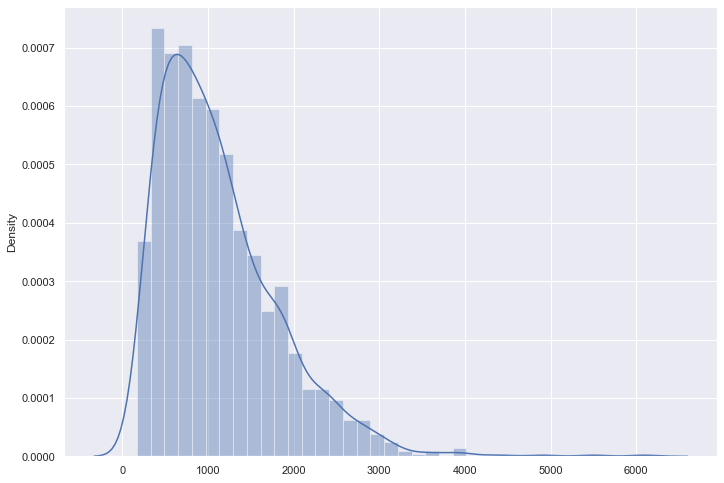

In [25]:
sns.distplot(df,x=df.Price_euros)

<AxesSubplot:>

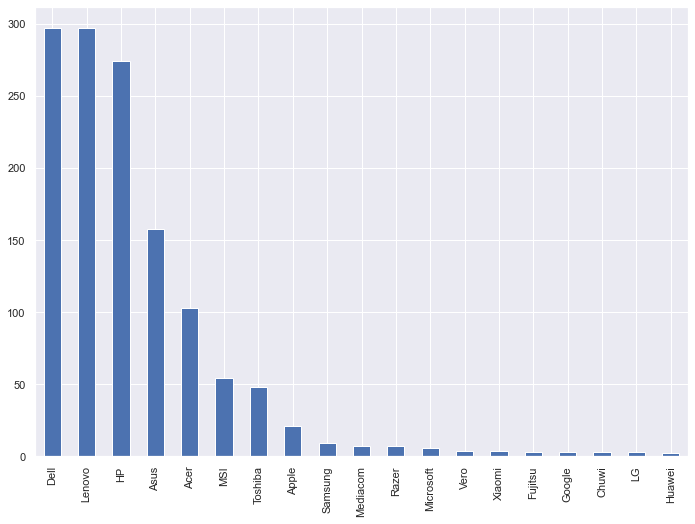

In [26]:
df.Company.value_counts().plot(kind='bar')

<AxesSubplot:>

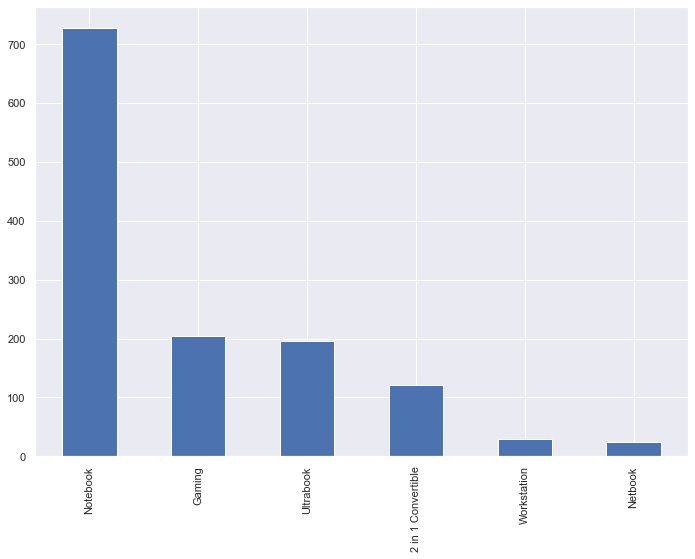

In [27]:
df.TypeName.value_counts().plot(kind='bar')

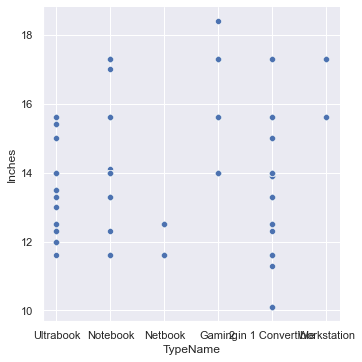

In [40]:
sns.relplot(x = "TypeName", y = "Inches", data = df)

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

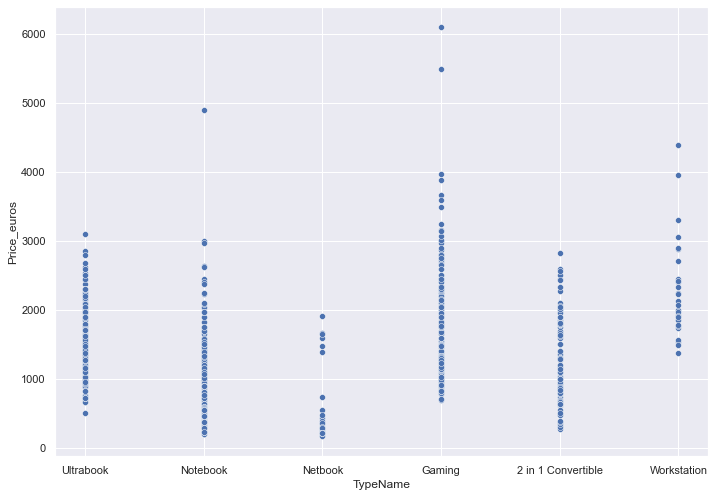

In [42]:
sns.scatterplot(x = "TypeName", y = "Price_euros", data = df)

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

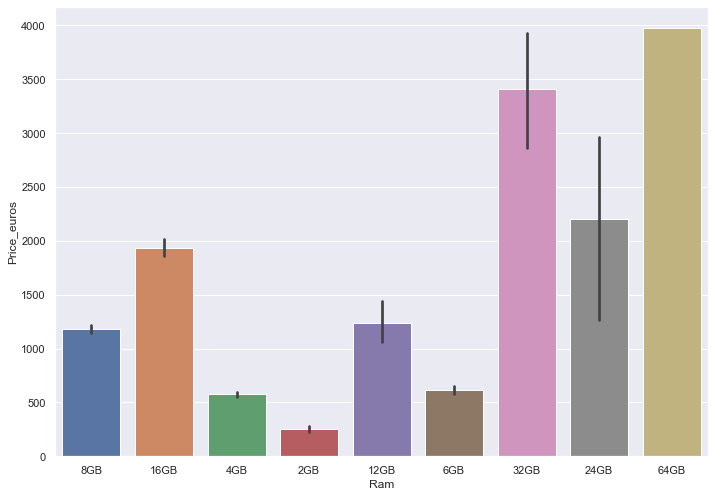

In [47]:
sns.barplot(x = "Ram", y = "Price_euros", data = df)

**Swarmplot**

C:\Users\acm\Downloads\Anacondapy\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acm\Downloads\Anacondapy\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acm\Downloads\Anacondapy\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acm\Downloads\Anacondapy\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acm\Downloads\Anacondapy\lib\site-packages\seaborn\categori

<AxesSubplot:xlabel='Company', ylabel='TypeName'>

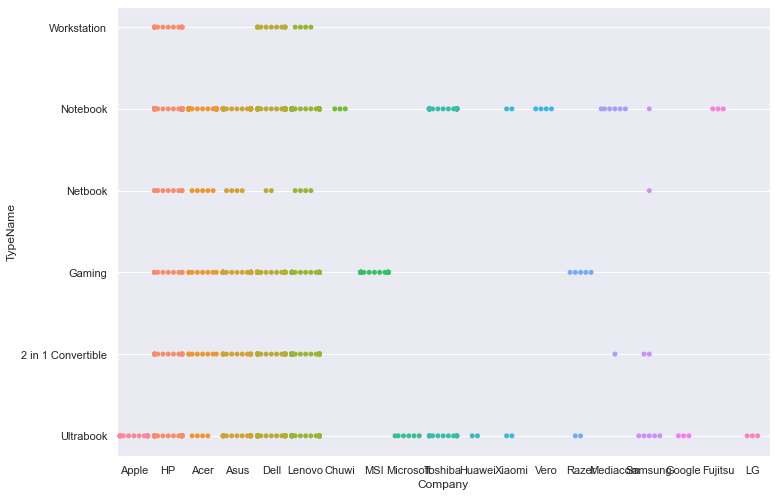

In [50]:
sns.swarmplot(x = "Company", y = "TypeName", data = df)

**Categorical Plot**

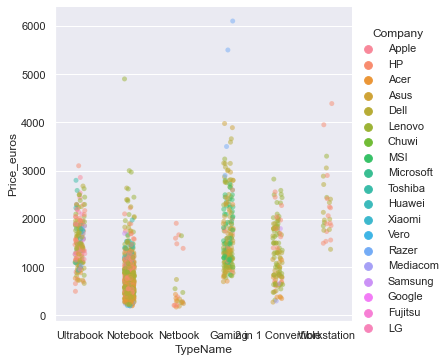

In [16]:
sns.catplot(x = "TypeName", y = "Price_euros",hue="Company",alpha=0.5,data = df);

**Boxplot**

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

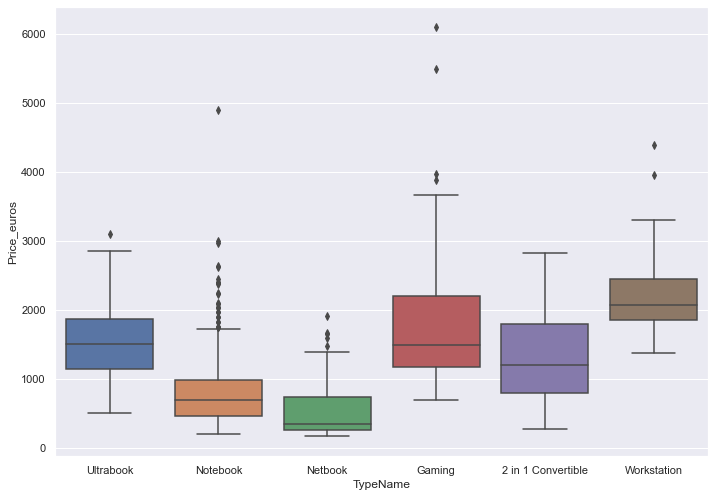

In [18]:
sns.boxplot(x = "TypeName", y = "Price_euros", data = df)

**BoxenPlot**

<AxesSubplot:xlabel='TypeName', ylabel='Inches'>

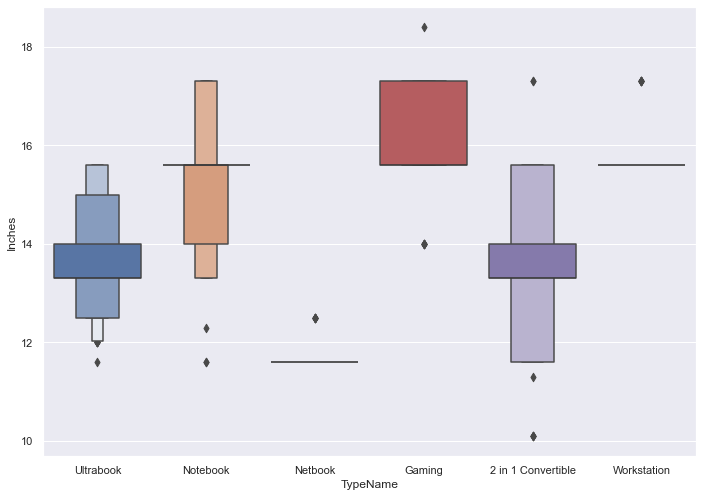

In [20]:
sns.boxenplot(x="TypeName", y = "Inches",data =df)

**FancyPlot**

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

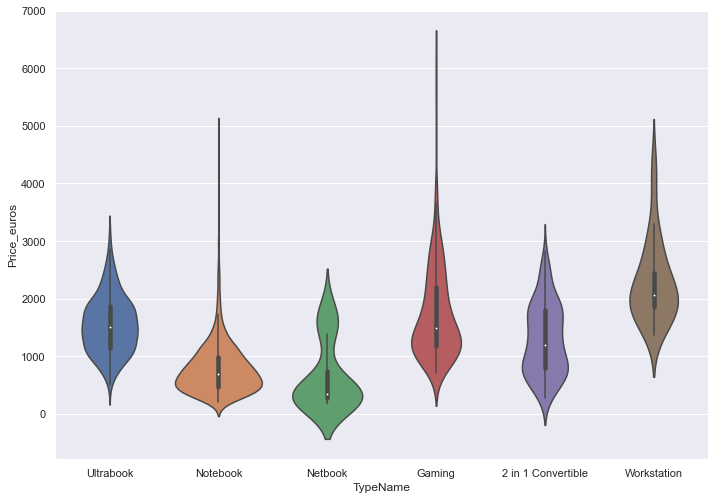

In [22]:
sns.violinplot(x ="TypeName", y = "Price_euros", data = df)

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

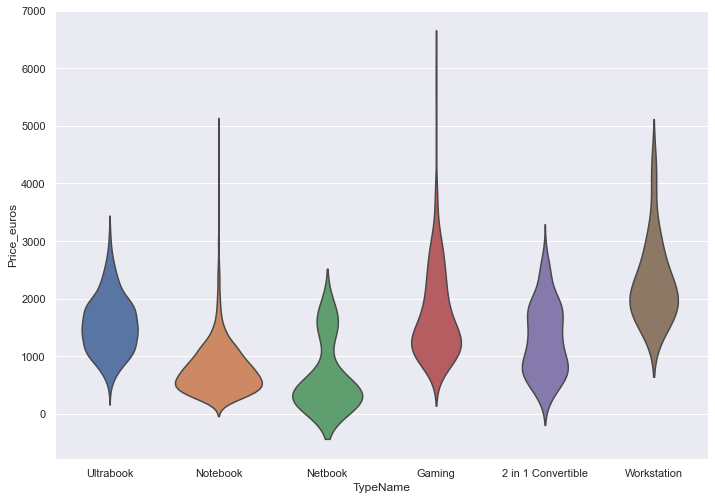

In [24]:
sns.violinplot(x = "TypeName", y = "Price_euros", inner = None, data = df)

**countplot**

<AxesSubplot:xlabel='Company', ylabel='count'>

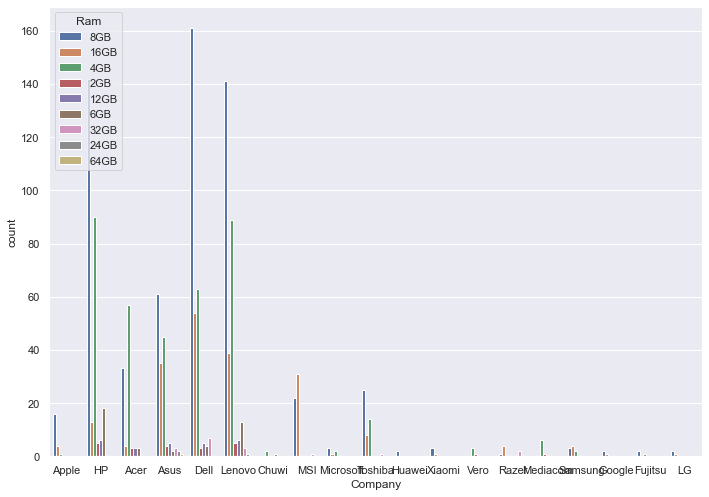

In [30]:
sns.countplot(x="Company",hue="Ram",data=df)

<AxesSubplot:xlabel='TypeName', ylabel='count'>

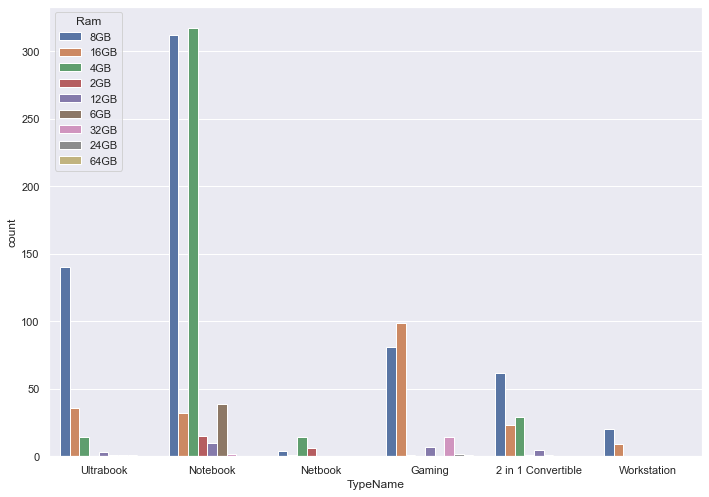

In [31]:
sns.countplot(x="TypeName",hue="Ram",data=df)

**Poitnplot**

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

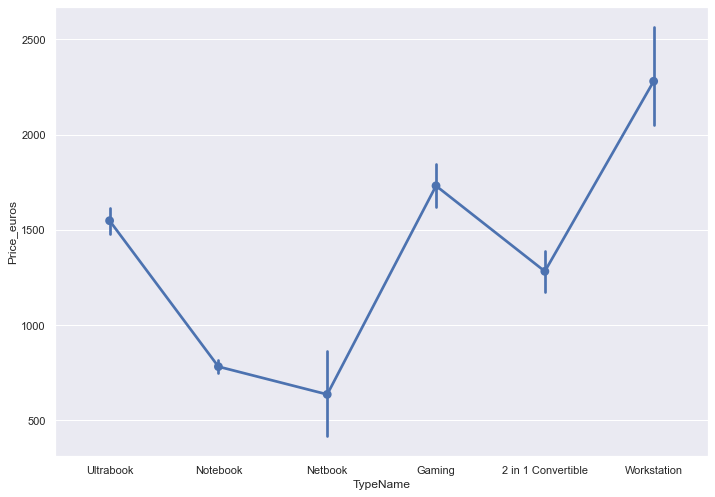

In [34]:
sns.pointplot(x = "TypeName", y = "Price_euros", data= df)

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

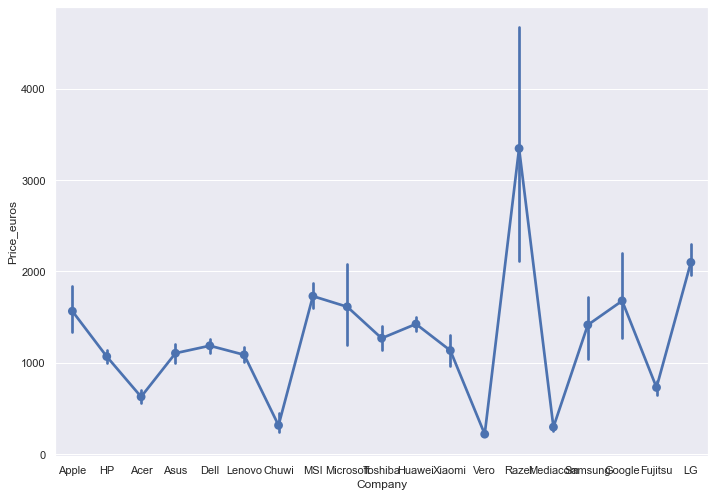

In [35]:
sns.pointplot(x = "Company", y = "Price_euros", data= df)

**histplot**

https://seaborn.pydata.org/generated/seaborn.histplot.html

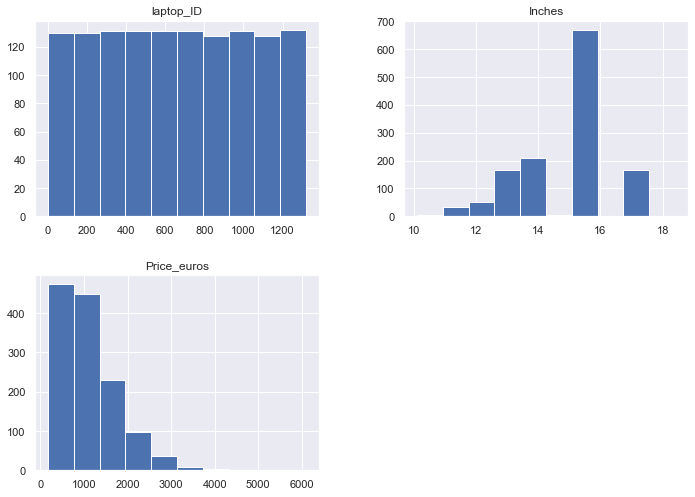

In [5]:
df.hist()
plt.show()

**pairplot**

https://seaborn.pydata.org/generated/seaborn.pairplot.html

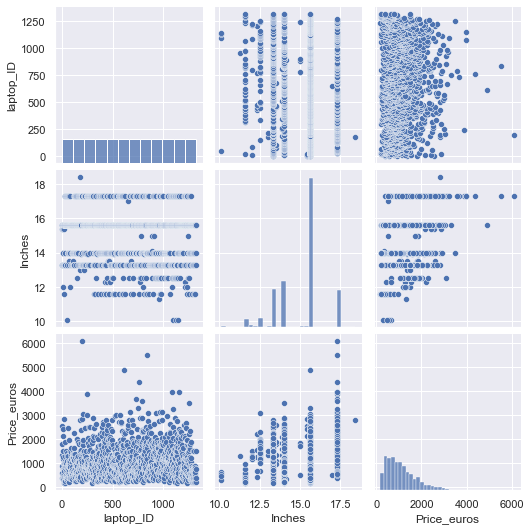

In [17]:
sns.pairplot(df)

**displot**

https://seaborn.pydata.org/tutorial/distributions.html

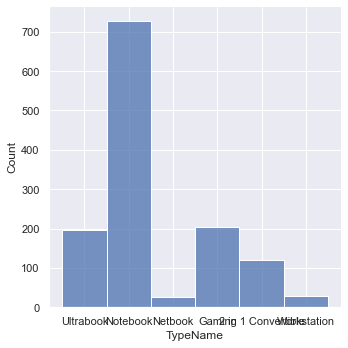

In [9]:
sns.displot(df, x="TypeName", binwidth=3)

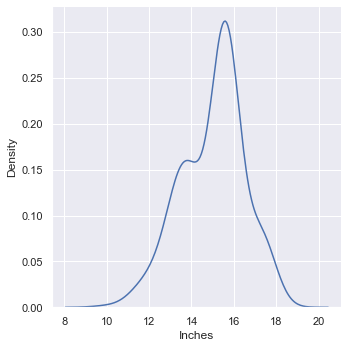

In [12]:
sns.displot(df, x="Inches", kind="kde", bw_adjust=2)

**regplot**

https://seaborn.pydata.org/generated/seaborn.regplot.html

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

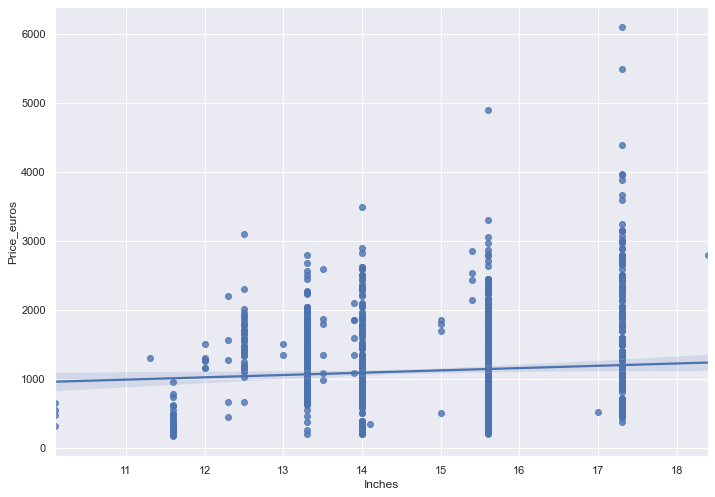

In [15]:
sns.regplot(x="Inches", y="Price_euros", data = df)

**Jointplot**

http://seaborn.pydata.org/generated/seaborn.jointplot.html

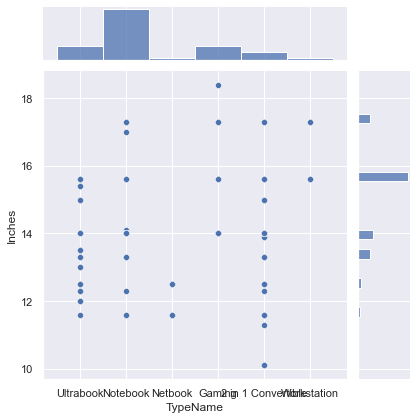

In [39]:
sns.jointplot(data=df, x="TypeName", y="Inches")